<a href="https://colab.research.google.com/github/allaltune/HCSPD_2024/blob/main/Semana%201/Actividad%20semana%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Actividad 1 - a.




Se asignan los valores:
  R = 1Ω,
  L = 1H y
  C = 1F

Queda el espacio de estados:

$$ A= \begin{bmatrix}
-1 & -1 \\
1 & 0 \\
\end{bmatrix}  $$

$$ B= \begin{bmatrix}
1  \\
 0 \\
\end{bmatrix}  $$

$$ C^T= \begin{bmatrix}
1 & 0 \\
\end{bmatrix}  $$

Se instala Octave

In [ ]:
!apt install octave

In [ ]:
!apt-get install -y liboctave-dev

In [4]:
%%writefile instalacion_pkg.m
pkg install -forge control


Writing instalacion_pkg.m


In [5]:
%%writefile inst_pkg_signal.m
pkg install -forge signal

Writing inst_pkg_signal.m


In [ ]:
!octave -W instalacion_pkg.m

In [7]:
!octave -W inst_pkg_signal.m

For information about changes from previous versions of the signal package, run 'news signal'.


Se resuelve en forma analítica mediante Octave:

In [8]:
%%writefile Calculo_RLC_Analitico.m
clear all; clc;
pkg load control
pkg load signal
warning('off','all');


#Defino el espacio de estados
A= [-1, -1; 1, 0];
B= [1; 0];
C= [1;0];
C_transp= C';
#Planteo el sistema
sys=ss(A,B,C_transp);
[num,den]=ss2tf(sys);
G=tf(num,den);
t=0:0.1:3;
u = zeros (length(t) ,1);
i=1;
for t=0:0.1:3
  i=i+1;
  u(i,1)=12;
  endfor
#Grafico y guardo el png
hfig1 = figure(1); set(hfig1, 'Visible', 'off');
lsim(sys,u,t);
print(hfig1,'Vars_temporal','-r300','-dpng');
save('Calculo_RLC_Analitico.mat','-v7');


Overwriting Calculo_RLC_Analitico.m


In [9]:
!octave -W Calculo_RLC_Analitico.m


Transfer function 'G' from input 'u1' to output ...

           1 s     
 y1:  -------------
      s^2 + 1 s + 1

Continuous-time model.
ans = -8.3648


In [10]:
!octave -W Calculo_RLC_Analitico.m
import scipy.io
mat = scipy.io.loadmat('/content/Calculo_RLC_Analitico.mat')


Transfer function 'G' from input 'u1' to output ...

           1 s     
 y1:  -------------
      s^2 + 1 s + 1

Continuous-time model.
ans = -8.3648


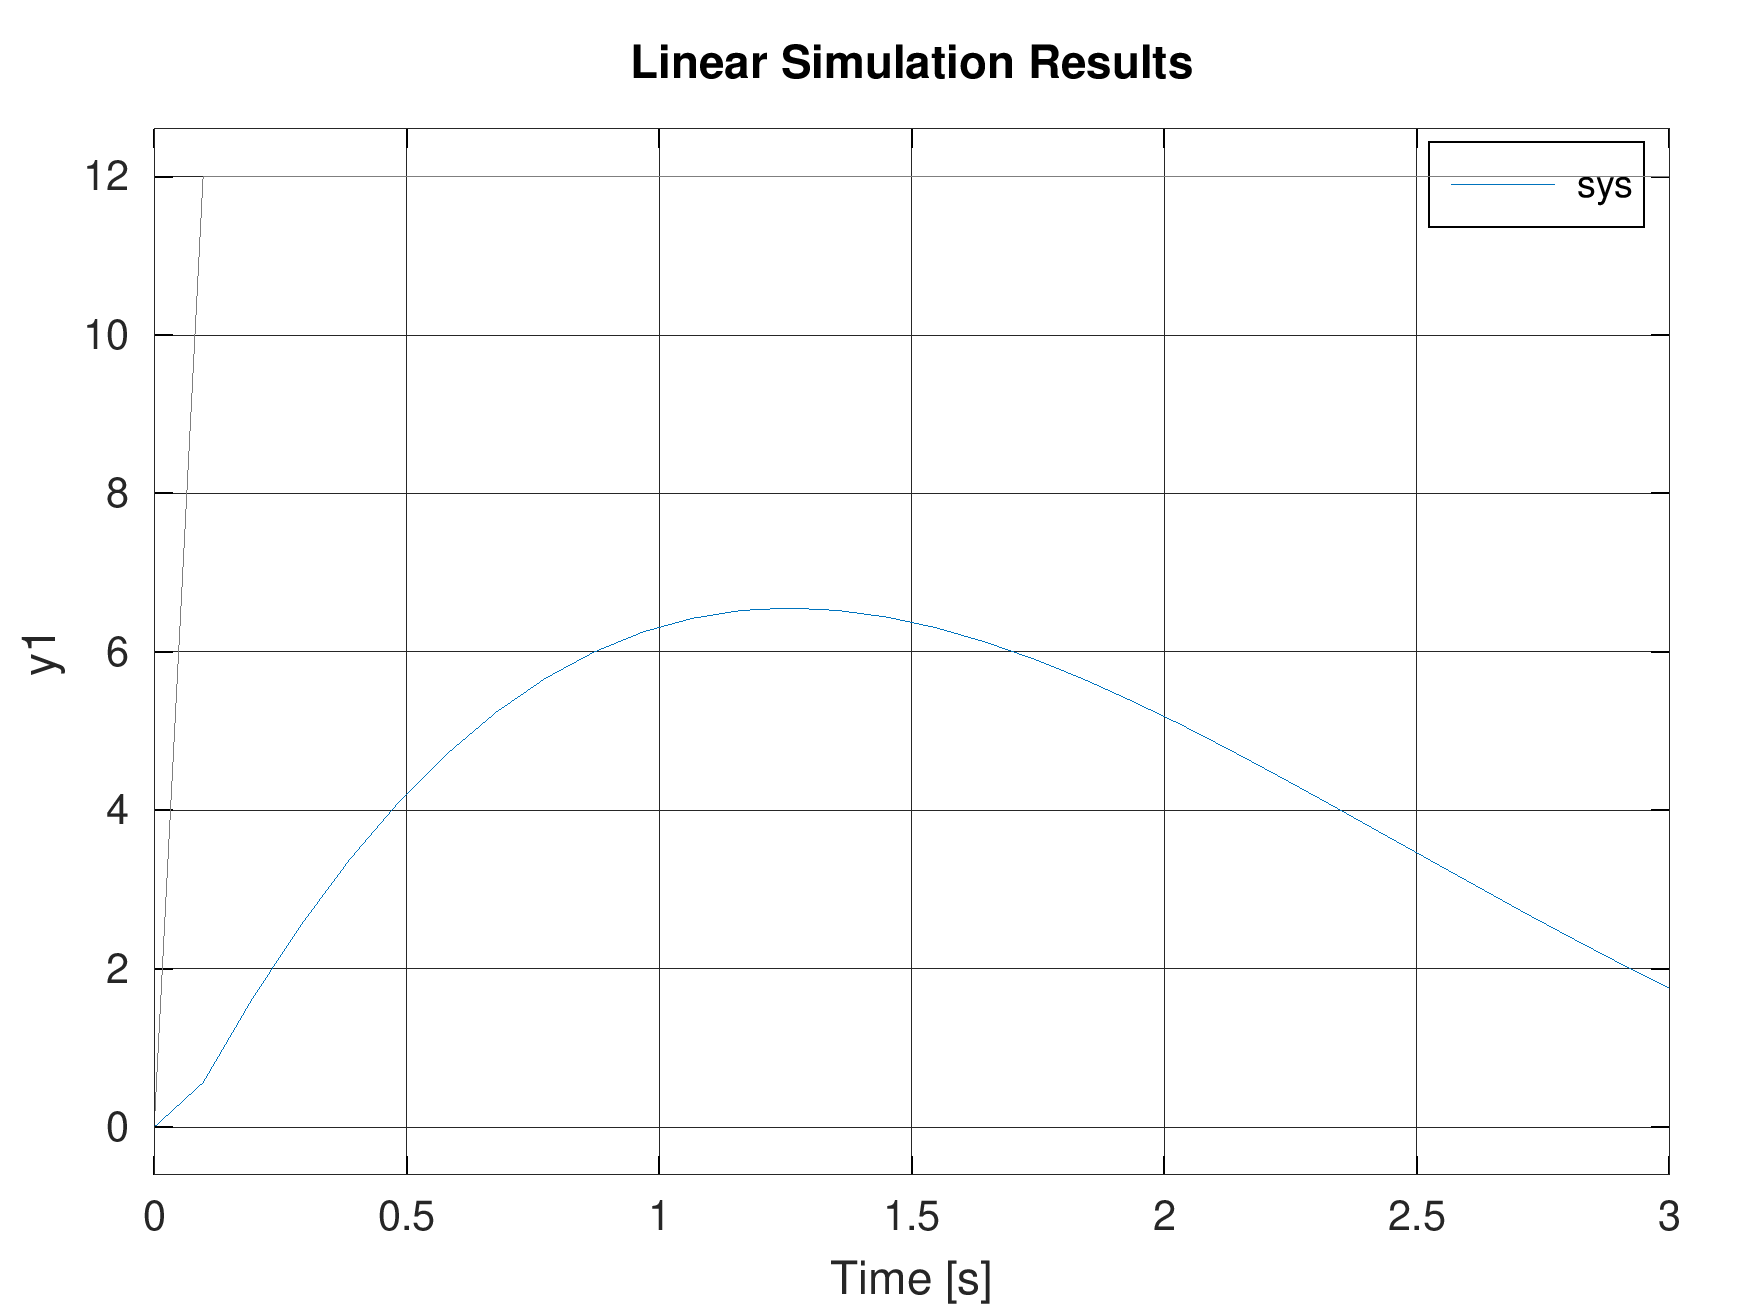

In [11]:
from PIL import Image
imt = Image.open("/content/Vars_temporal.png")
imt

#Actividad 1 - b.

Planteando la solución mediante Euler: